# A Finite Element Examples: Beam 02

This example is based on the beam02 example distributed with FEM.edu

Class demo

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.elements.Beam2D import *
from femedu.materials.ElasticSection import ElasticSection

## Build a model

In [3]:
# initialize a system model
SpanLengths = [ 8.0 * 12, 10.0 * 12, 8.0 * 12 ]
Nelems = 2     # number of elements
params = {'E': 29000., 'A': 5, 'I':50}

# define load
w = -1.00

# meshing parameters
Xnode  = 0.0
Ynode  = 0.0
Offset = 0.0

model = System()

# create left node
nd0 = Node(Xnode, Ynode)
nd0.fixDOF('ux', 'uy')     # pin support left end
model += nd0

# initialization for node and element creation
ndi = nd0

for SpanLength in SpanLengths:

    Le = SpanLength / Nelems

    for e in range(Nelems):
        # create next node
        Xnode += Le
        ndj = Node(Xnode, Ynode)
        model += ndj

        # create elements
        elem = Beam2D(ndi, ndj, ElasticSection(params))
        model += elem

        elem.setDistLoad(w)
        
        # shift one node to the right
        ndi = ndj

    # define support(s)
    ndj.fixDOF('uy')           # roller support right end

    # move on to the next span
    Offset = Xnode

# done building the model

## Solve the system equations

In [4]:
# analyze the model
model.solve()

In [5]:
# lots of detail on the state of the model
model.report()


System Analysis Report

Nodes:
---------------------
  Node 0: {'uy': 0, 'rz': 1}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0.], u:[ 0.        -0.0123663]
  Node 1: {'uy': 0, 'rz': 1}
          x:[48.  0.], fix:[], 
          P:[0. 0.], u:[-0.292646    0.00326429]
  Node 2: {'uy': 0, 'rz': 1}
          x:[96.  0.], fix:['uy'], 
          P:[0. 0.], u:[ 0.         -0.00069085]
  Node 3: {'uy': 0, 'rz': 1}
          x:[156.   0.], fix:[], 
          P:[0. 0.], u:[-3.93139430e-01 -4.24063967e-19]
  Node 4: {'uy': 0, 'rz': 1}
          x:[216.   0.], fix:['uy'], 
          P:[0. 0.], u:[0.         0.00069085]
  Node 5: {'uy': 0, 'rz': 1}
          x:[264.   0.], fix:[], 
          P:[0. 0.], u:[-0.292646   -0.00326429]
  Node 6: {'uy': 0, 'rz': 1}
          x:[312.   0.], fix:['uy'], 
          P:[0. 0.], u:[0.        0.0123663]

Elements:
---------------------
  Beam2D: node 0 to node 1:
     material ElasticSection properties: {'E': 29000.0, 'A': 5, 'I': 50, 'nu': 0.0, 'fy

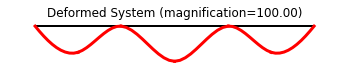

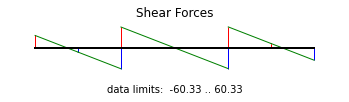

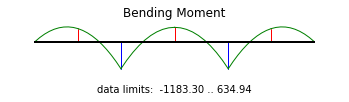

In [6]:
# create plots
model.plot(factor=100., filename="beam02_deformed.png")

model.beamValuePlot('V', filename="beam02_shear.png")
model.beamValuePlot('M', filename="beam02_moment.png")

In [7]:
# extracting information for a single node
print(ndP)

Node 5: {'uy': 0, 'rz': 1}
        x:[264.   0.], fix:[], 
        P:[0. 0.], u:[-0.292646   -0.00326429]
